In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# Fibo

In [2]:
A = np.array([[1, 1],
              [1, 0]])

In [3]:
eigvals, eigvects = np.linalg.eig(A)

In [4]:
idx = np.argmax(eigvals)

dominant_eigvect = eigvects[:, idx].reshape(-1, 1)
dominant_eigval = eigvals[idx]

In [5]:
dominant_eigvect

array([[0.85065081],
       [0.52573111]])

In [6]:
from itertools import product

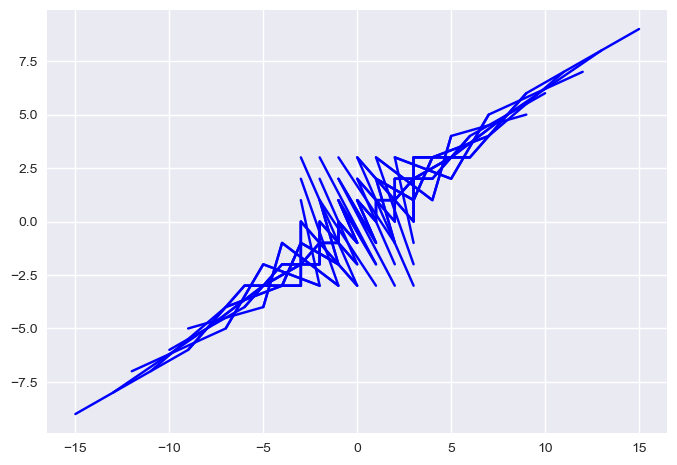

In [7]:
points = product(np.linspace(-3, 3, 7), np.linspace(-3, 3, 7))

for x0, y0 in points:
    init_vect = np.array([[x0],
                          [y0]])
    states = [init_vect]
    for _ in range(3):
        new_state = A @ states[-1]
        states.append(new_state)
        
    res = np.hstack(states).T
    plt.plot(res[:, 0], res[:, 1], c='b')

plt.show()

# Symmetric matrix

In [8]:
from matplotlib import cm

In [9]:
A = np.array([[1, -1, 0],
              [-1, -3, 1],
              [0, 1, 1]])

In [10]:
A.T == A

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [11]:
eigvals, eigvects = np.linalg.eig(A)

In [12]:
idx = np.argmax(np.abs(eigvals))

dominant_eigvect = eigvects[:, idx].reshape(-1, 1)
dominant_eigval = eigvals[idx]

In [13]:
dominant_eigval

-3.449489742783178

In [14]:
dominant_eigvect

array([[ 0.2141865 ],
       [ 0.95302061],
       [-0.2141865 ]])

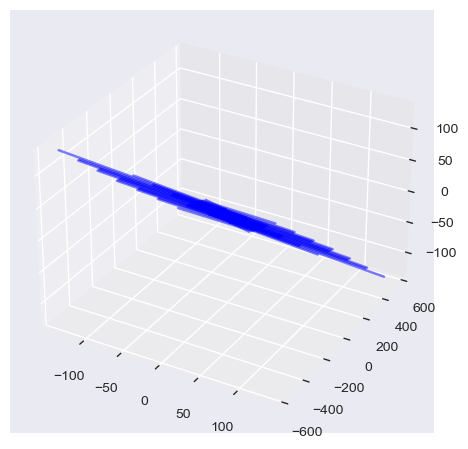

In [15]:
points = product(np.linspace(-3, 3, 4), np.linspace(-3, 3, 4), np.linspace(-3, 3, 4))
ax = plt.figure().add_subplot(projection='3d')

for x0, y0, z0 in points:
    init_vect = np.array([[x0],
                           [y0],
                           [z0]])
    states = [init_vect]
    for _ in range(4):
        new_state = A @ states[-1]
        states.append(new_state)
        
    res = np.hstack(states).T
    ax.plot(res[:, 0], res[:, 1], res[:, 2], c='b', alpha=0.5)

plt.show()

# opinion diffusion

In [16]:
A = np.array([[1/3, 1/3, 0, 0, 1/3],
              [1/3, 1/3, 1/3, 0, 0], 
              [0, 1/3, 1/3, 1/3, 0],
              [0, 0, 1/3, 1/3, 1/3],
              [1/3, 0, 0, 1/3, 1/3]])

In [17]:
eigvals, eigvects = np.linalg.eig(A)

In [18]:
idx = np.argmax(np.abs(eigvals))

dominant_eigvect = eigvects[:, idx].reshape(-1, 1)
dominant_eigval = eigvals[idx]

In [19]:
dominant_eigvect

array([[-0.4472136],
       [-0.4472136],
       [-0.4472136],
       [-0.4472136],
       [-0.4472136]])

In [20]:
dominant_eigval

1.0

In [21]:
init_vect = np.random.rand(5, 1) * 10
init_vect

array([[5.96273097],
       [7.3608185 ],
       [1.1964434 ],
       [2.42597656],
       [6.44763854]])

In [22]:
states = [init_vect]
for _ in range(100):
    new_state = A @ states[-1]
    states.append(new_state)

res = np.hstack(states).T

In [23]:
res[-1]

array([4.67872159, 4.67872159, 4.67872159, 4.67872159, 4.67872159])

In [24]:
init_vect.mean()

4.6787215943841876